<a href="https://colab.research.google.com/github/sma-health/unstructured-data/blob/master/02_text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coronavirus Disease 2019**

Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was first identified in December 2019 in Wuhan, Hubei, China, and has resulted in an ongoing pandemic. The first confirmed case has been traced back to 17 November 2019 in Hubei.As of 6 August 2020, more than 18.7 million cases have been reported across 188 countries and territories, resulting in more than 706,000 deaths. More than 11.3 million people have recovered.

Common symptoms include fever, cough, fatigue, shortness of breath, and loss of smell and taste.While the majority of cases result in mild symptoms, some progress to acute respiratory distress syndrome (ARDS) possibly precipitated by cytokine storm,multi-organ failure, septic shock, and blood clots.The time from exposure to onset of symptoms is typically around five days, but may range from two to fourteen days.

Source: wikipedia.

Most of the people today share opinions and information through various social media, including Twitter. Today we will analyze the content of conversations between Twitter users regarding the keyword "virus" in English.

We use text mining technique to analyze this textual data. Text mining is a process of exploring sizeable textual data and find patterns. Text Mining process the text itself. Finding frequency counts of words, length of the sentence, presence/absence of specific words is known as text mining.

Natural language processing is one of the components of text mining. NLP helps identified sentiment, finding entities in the sentence, and category of blog/article. Text mining is preprocessed data for text analytics. In Text Analytics, statistical and machine learning algorithm used to classify information.

## **A. Text Preprocessing**

Text preprocessing is traditionally an important step for natural language processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

***Import Library***

We need to import some libraries first. Here are the libraries we need to import.

In [ ]:
# Import library for Text Analytics
import nltk
nltk.download('vader_lexicon')

In [2]:
# Import Libraries for Data Manipulation
import pandas as pd
import matplotlib.pyplot as plt

***Import Data***

Then, import our demonetization tweets dataset into this notebook using Pandas library. 

In [ ]:
# Import Data
tweets=pd.read_csv('https://raw.githubusercontent.com/dianrdn/data/master/virus.csv')
tweets.head()

***Select Data***

We will use only text(tweets) data in this text mining modeling.

In [ ]:
# Select Only Text Column
text = tweets[['text']]
text.head()

***Clean the Dataset***

In [ ]:
# Create Text Cleaning Function using Regex
import re

def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"\d+", "", elem))
    return df

# Apply to the data
text_clean = clean_text(text, 'text')
text_clean.head()

In [ ]:
# Import Stopword
import nltk.corpus
nltk.download('stopwords')

# Apply Stopword to the dataframe
from nltk.corpus import stopwords
stop = stopwords.words('english')

text_clean['nostopword'] = text_clean['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
text_clean.head()

In [ ]:
# Import Punkt
import nltk 
nltk.download('punkt')

# Tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
text_clean['tokenize'] = text_clean['nostopword'].apply(lambda x: word_tokenize(x))
text_clean.head()

In [ ]:
# Import Stemmer
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize

# Create Stemmer Function
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text

# Apply to the dataframe
text_clean['stemming'] = text_clean['tokenize'].apply(lambda x: word_stemmer(x))
text_clean.head()

In [ ]:
# Import Wordnet Library
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Create Lematization Funtion
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i, pos='v') for i in text]
    return lem_text

# Apply to a dataframe
text_clean['lemmatization'] = text_clean['tokenize'].apply(lambda x: word_lemmatizer(x))
text_clean.head()

In [ ]:
# Convert to a New Dataframe
text_preprocessed = text_clean['lemmatization'].str.join(",") 
text_preprocessed = text_preprocessed.str.replace(',', ' ', regex=False)
text_preprocessed = pd.DataFrame(text_preprocessed)
text_preprocessed.rename(columns={'lemmatization': 'text'}, inplace = True)
text_preprocessed

In [27]:
# Save as CSV
text_preprocessed.to_csv('text_preprocessed_virus.csv', index=False)

## **B. Sentiment Analysis**

Text classification is the process of assigning tags or categories to text according to its content. It’s one of the fundamental tasks in Natural Language Processing (NLP) with broad applications such as sentiment analysis, topic labeling, spam detection, and intent detection.

***Import Library***

In [ ]:
# Import library for Text Analytics
nltk.download('vader_lexicon')

In [31]:
# Import Libraries for Data Manipulation
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

***Modeling Sentiment Analysis***

In [ ]:
# Import Module
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
listy = [] 
for index, row in text_preprocessed.iterrows():
  ss = sid.polarity_scores(row['text'])
  listy.append(ss)
  
se = pd.Series(listy)
text_preprocessed['polarity'] = se.values
display(text_preprocessed.head(5))

In [ ]:
# Pie Chart Visualization
labels = ['negative', 'neutral', 'positive']
sizes  = [ss['neg'], ss['neu'], ss['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

In [34]:
# Save as CSV
text_preprocessed.to_csv('sentiment_virus.csv', index=False)

## **C. Topic Modeling**

Topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently: "dog" and "bone" will appear more often in documents about dogs, "cat" and "meow" will appear in documents about cats, and "the" and "is" will appear equally in both. 

***Install Library, Import Libraries, and Import Modules***

In [ ]:
# Install Library
! pip install pyLDAvis

In [36]:
# Import Libraries
import nltk
import os
import numpy as np, pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()

# Import Modules
from __future__ import print_function 
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt

In [ ]:
# Clone Library and Data from Github
! git clone https://github.com/dianrdn/tm

# Set Data Directory
os.chdir('tm')

In [ ]:
# Import Stop Words
nltk.download('stopwords')

# Import Data
text_preprocessed = 'text_preprocessed_virus.csv'

# Load Tweets Data
import MyLib as TS
Tweets = TS.LoadTxt(text_preprocessed) 
print('Total loaded tweets = {0}'.format(len(Tweets)))

***Set Number of Topics, Top Topics, Top Words***

In [39]:
n_topics = 4
top_topics = 4
top_words = 8

***Feature Extraction***

In [40]:
# Feature Extraction
count_vector = CountVectorizer(lowercase = True, token_pattern = r'\b[a-zA-Z]{3,}\b') 
dtm_tf = count_vector.fit_transform(Tweets)
tf_terms = count_vector.get_feature_names()
del Tweets

***Show Topic***

In [ ]:
# Topic Search Function
lda_tf = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=0).fit(dtm_tf)

# Show Topics
vsm_topics = lda_tf.transform(dtm_tf); doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
print('In total there are {0} major topics, distributed as follows'.format(len(set(doc_topic))))
plt.hist(np.array(doc_topic), alpha=0.5); plt.show()
print('Printing top {0} Topics, with top {1} Words:'.format(top_topics, top_words))
TS.print_Topics(lda_tf, tf_terms, top_topics, top_words)

In [ ]:
# Interactively visualizing the Topics, please ignore the Warnings
# Wait few minutes and then hover the Mouse over the Topics to Explore
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, count_vector) 

## **D. Text Network Analysis**

Though network analysis is most often used to describe relationships between people, some of the early pioneers of network analysis realized that it could also be applied to represent relationships between words. For example, one can represent a corpus of documents as a network where each node is a document, and the thickness or strength of the edges between them describes similarities between the words used in any two documents. Or, one can create a textnetwork where individual words are the nodes, and the edges between them describe the regularity with which they co-occur in documents.

There are multiple advantages to a network-based approach to automated text analysis. Just as clusters of social connections can help explain a range of outcomes, understanding patterns of connections between words helps identify their meaning in a more precise manner.Second, text networks can be built out of documents of any length, whereas topic models function poorly on short texts such as social media messages.

In this prcatice we will use NetworkX. NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. You can see the full documentation of NetworkX HERE

Here we construct a text network based on conversations about 'Demonetization in India'.

**Install & Import Libraries**

In [ ]:
# Import Libraries
import numpy as np
import nltk
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from nltk import bigrams
from nltk.tokenize import word_tokenize
from random import seed

nltk.download('punkt')

**Import Data**

In [ ]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/dianrdn/data/master/text_preprocessed_virus_short.csv', sep = ',')

# Show Data
df

In [ ]:
# Convert to String
text_preprocessed['text']=text_preprocessed['text'].fillna('').apply(str)

In [ ]:
# Select Text
text = text_preprocessed['text']
text

### **Preparing Adjacency Matrix**

In [ ]:
# Tokenize
text_data = [word_tokenize(i) for i in text]
print(text_data)

In [ ]:
# Create Fuction to show co occurrence
def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index

In [ ]:
# Create one list using many lists
data = list(itertools.chain.from_iterable(text_data))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)

# Show Adjacency Matrix
data_matrix.head()

In [ ]:
data_matrix.info()

### **Constructing Text Network**

In [ ]:
# Contstruct a Network
G = nx.from_pandas_adjacency(data_matrix)

# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(50,40))
nx.draw(G, with_labels=True, 
        node_color='skyblue', node_size=600, 
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=7,
        pos=nx.kamada_kawai_layout(G))

### **Network Metrics and Measurement**

**Centrality Measurement**

In graph theory and network analysis, indicators of centrality identify the most important vertices within a graph. Applications include identifying the most influential person(s) in a social network, key infrastructure nodes in the Internet or urban networks, and super-spreaders of disease. Centrality concepts were first developed in social network analysis, and many of the terms used to measure centrality reflect their sociological origin.

In [ ]:
# Degree Centrality
degree = nx.degree_centrality(G)

# Sorted from the Highest
sorted(nx.degree(G), key=lambda x: x[1], reverse=True)[0:10]

In [ ]:
# Betweenness Centrality
betweenness = nx.betweenness_centrality(G)

# Sorted from the Highest
sorted(nx.betweenness_centrality(G, normalized=True).items(), key=lambda x:x[1], reverse=True)[0:10]

In [ ]:
# Closeness Centrality
closeness = nx.closeness_centrality(G)

# Sorted from the Highest
sorted(nx.closeness_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]

In [ ]:
# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)

# Sorted from the Highest
sorted(nx.eigenvector_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]

***Visualize Network based on Centrality Measurement***

In [ ]:
# Set Degree Dictionary
d = dict(degree)

# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(50,40))
nx.draw(G, with_labels=True, 
        node_color='skyblue', nodelist=d.keys(),
        node_size=[v * 50000 for v in d.values()], 
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=8,
        pos=nx.kamada_kawai_layout(G))

**Network Topology Measurement**

The configuration, or topology, of a network is key to determining its performance. Network topology is the way a network is arranged, including the physical or logical description of how links and nodes are set up to relate to each other.

In [ ]:
# Show Number of Nodes
nx.number_of_nodes(G)

In [ ]:
# Show Number of Edges
nx.number_of_edges(G)

In [ ]:
# Show Graph Density
nx.density(G)

### **Community Detection**

Community detection is a fundamental problem in dividing text (modelled as nodes in a social graph) with certain word connections into densely knitted and highly related groups with each group well separated from different group members.

**Modularity Community**

In [ ]:
# Import Module
from networkx.algorithms.community import greedy_modularity_communities

# Modularity Community Detection
communities_m = sorted(greedy_modularity_communities(G), key=len, reverse=True)
communities_m

In [ ]:
# Set Node Community Function
def set_node_community(G, communities_m):
      '''Add community to node attributes'''
      for c, v_c in enumerate(communities_m):
        for v in v_c:
          # Add 1 to save 0 for external edges
          G.nodes[v]['community'] = c + 1      

In [ ]:
# Set Colour Function
def get_color(i, r_off=1, g_off=1, b_off=1):
     '''Assign a color to a vertex.'''
     r0, g0, b0 = 0, 0, 0
     n = 16
     low, high = 0.1, 0.9
     span = high - low
     r = low + span * (((i + r_off) * 3) % n) / (n - 1)
     g = low + span * (((i + g_off) * 5) % n) / (n - 1)
     b = low + span * (((i + b_off) * 7) % n) / (n - 1)
     return (r, g, b) 

In [ ]:
# Set Node Communities
community = set_node_community(G, communities_m)

# Set Node Color
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(50,40))
nx.draw(G, with_labels=True, 
        node_color = node_color, node_size=600, 
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=7, map = plt.get_cmap('jet'),
        pos=nx.kamada_kawai_layout(G))

## **E. Word Cloud**

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

Also known as tag clouds or text clouds, these are ideal ways to pull out the most pertinent parts of textual data, from blog posts to databases. They can also help business users compare and contrast two different pieces of text to find the wording similarities between the two.

In [52]:
# Import Libraries
import wordcloud
import matplotlib.pyplot as plt

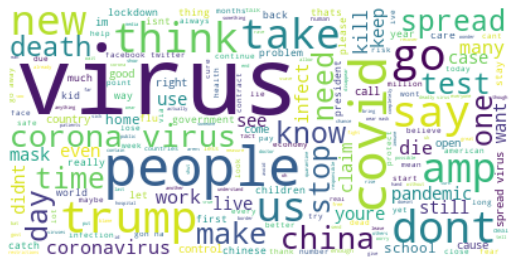

In [53]:
# Import Modules
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Build Word Cloud
text = " ".join(review for review in df.text)
cloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(7, 7), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Save File
cloud.to_file("wordcloud.png")